# Logistic Regression

In [1]:
#bank dataset 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Data collection and data understanding

In [4]:
bank = pd.read_csv('bank-full.csv',sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
bank.shape

(45211, 17)

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
pd.crosstab(bank['job'],bank['y'])

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [11]:
#EDA

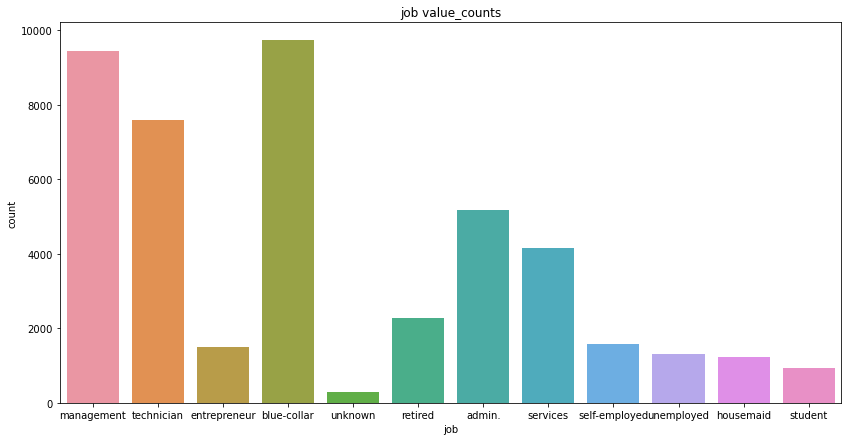

In [12]:
plt.figure(figsize=(14,7))
plt.title('job value_counts')
sns.countplot(bank['job'])
plt.show()

In [13]:
pd.crosstab(bank['marital'],bank['y'])

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


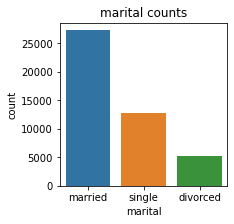

In [14]:
plt.figure(figsize=(3,3))
plt.title('marital counts')
sns.countplot(bank['marital'])
plt.show()

In [15]:
pd.crosstab(bank['education'],bank['y'])

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


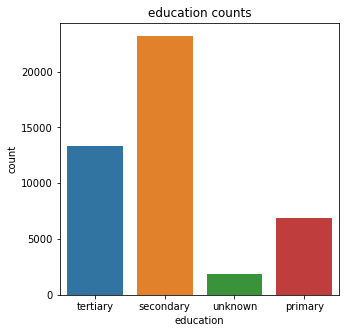

In [16]:
plt.figure(figsize=(5,5))
plt.title('education counts')
sns.countplot(bank['education'])
plt.show()

In [17]:
pd.crosstab(bank['default'],bank['y'])

y,no,yes
default,,
no,39159,5237
yes,763,52


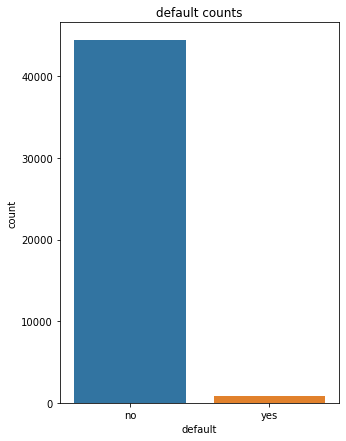

In [18]:
plt.figure(figsize=(5,7))
plt.title('default counts')
sns.countplot(bank['default'])
plt.show()

In [19]:
pd.crosstab(bank['housing'],bank['y'])

y,no,yes
housing,,
no,16727,3354
yes,23195,1935


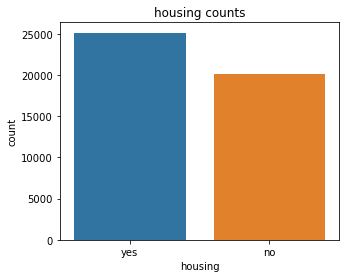

In [20]:
plt.figure(figsize=(5,4))
plt.title('housing counts')
sns.countplot(bank['housing'])
plt.show()

In [21]:
pd.crosstab(bank['contact'],bank['y'])

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


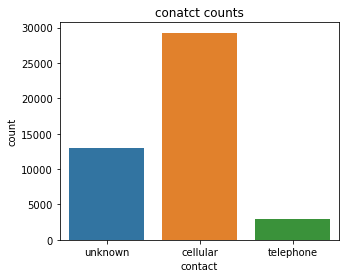

In [22]:
plt.figure(figsize=(5,4))
plt.title('conatct counts')
sns.countplot(bank['contact'])
plt.show()

In [23]:
pd.crosstab(bank['poutcome'],bank['y'])

y,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


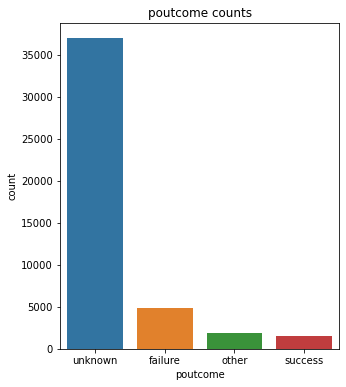

In [24]:
plt.figure(figsize=(5,6))
plt.title('poutcome counts')
sns.countplot(bank['poutcome'])
plt.show()

In [25]:
#Data preparation

In [26]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [27]:
bank.drop('default',axis=1,inplace=True)

In [28]:
encoder=LabelEncoder()

In [29]:
bank['y'] = encoder.fit_transform(bank['y'])
bank['month'] = encoder.fit_transform(bank['month'])
bank['housing'] = encoder.fit_transform(bank['housing'])
bank=pd.get_dummies(bank,columns=['job'],drop_first=True)
bank=pd.get_dummies(bank,columns=['marital'],drop_first=True)
bank=pd.get_dummies(bank,columns=['education'],drop_first=True)
bank=pd.get_dummies(bank,columns=['loan'],drop_first=True)
bank=pd.get_dummies(bank,columns=['contact'],drop_first=True)
bank=pd.get_dummies(bank,columns=['poutcome'],drop_first=True)

In [30]:
bank

,age,balance,housing,day,month,duration,campaign,pdays,previous,y,...,marital_single,education_secondary,education_tertiary,education_unknown,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,5,8,261,1,-1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,44,29,1,5,8,151,1,-1,0,0,...,1,1,0,0,0,0,1,0,0,1
2,33,2,1,5,8,76,1,-1,0,0,...,0,1,0,0,1,0,1,0,0,1
3,47,1506,1,5,8,92,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,33,1,0,5,8,198,1,-1,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,17,9,977,3,-1,0,1,...,0,0,1,0,0,0,0,0,0,1
45207,71,1729,0,17,9,456,2,-1,0,1,...,0,0,0,0,0,0,0,0,0,1
45208,72,5715,0,17,9,1127,5,184,3,1,...,0,1,0,0,0,0,0,0,1,0
45209,57,668,0,17,9,508,4,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [31]:
bank.dtypes

age                    int64
balance                int64
housing                int32
day                    int64
month                  int32
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int32
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
loan_yes               uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
dtype: object

In [32]:
x=bank.drop('y',axis=1)
y=bank[['y']]

In [33]:
std_scale = StandardScaler()
std_scale = std_scale.fit_transform(x)
std_x = pd.DataFrame(std_scale,columns=x.columns)

In [34]:
std_x

,age,balance,housing,day,month,duration,campaign,pdays,previous,job_blue-collar,...,marital_single,education_secondary,education_tertiary,education_unknown,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,0.893915,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.251940,-0.523740,...,-0.628090,-1.026745,1.548892,-0.206962,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,0.893915,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.251940,-0.523740,...,1.592128,0.973952,-0.645623,-0.206962,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,0.893915,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.251940,-0.523740,...,-0.628090,0.973952,-0.645623,-0.206962,2.289359,-0.262091,1.572395,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,0.893915,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.251940,1.909346,...,-0.628090,-1.026745,-0.645623,4.831796,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-1.118674,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.251940,-0.523740,...,1.592128,-1.026745,-0.645623,4.831796,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,-1.118674,0.143418,1.156344,2.791329,0.076230,-0.411453,-0.251940,-0.523740,...,-0.628090,-1.026745,1.548892,-0.206962,-0.436803,-0.262091,-0.635972,-0.205972,-0.185948,0.472519
45207,2.831227,0.120447,-1.118674,0.143418,1.156344,0.768224,-0.246560,-0.411453,-0.251940,-0.523740,...,-0.628090,-1.026745,-0.645623,-0.206962,-0.436803,-0.262091,-0.635972,-0.205972,-0.185948,0.472519
45208,2.925401,1.429593,-1.118674,0.143418,1.156344,3.373797,0.721811,1.436189,1.050473,-0.523740,...,-0.628090,0.973952,-0.645623,-0.206962,-0.436803,-0.262091,-0.635972,-0.205972,5.377848,-2.116316
45209,1.512791,-0.228024,-1.118674,0.143418,1.156344,0.970146,0.399020,-0.411453,-0.251940,1.909346,...,-0.628090,0.973952,-0.645623,-0.206962,-0.436803,3.815470,-0.635972,-0.205972,-0.185948,0.472519


In [35]:
#data building

In [36]:
model=LogisticRegression()

In [37]:
x_data=std_x
y_data=bank[['y']]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=12,shuffle=True,stratify=y_data)

In [39]:
x_train.shape,y_train.shape

((36168, 31), (36168, 1))

In [40]:
x_test.shape,y_test.shape

((9043, 31), (9043, 1))

In [41]:
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
#Data training

In [43]:
y_train_pred=model.predict(x_train)

In [44]:
accuracy_score(y_train,y_train_pred)

0.9000497677504977

In [45]:
confusion_matrix(y_train,y_train_pred)

array([[31197,   740],
       [ 2875,  1356]], dtype=int64)

0.6486604961980256


Text(0, 0.5, 'True Positive Rate')

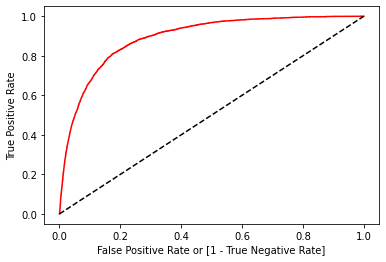

In [46]:
fpr , tpr , thresholds = roc_curve(y_train,model.predict_proba(x_train)[:,1])
auc = roc_auc_score(y_train,y_train_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [47]:
#Data testing

In [48]:
y_test_pred=model.predict(x_test)

In [49]:
accuracy_score(y_test,y_test_pred)

0.9014707508570164

In [50]:
confusion_matrix(y_test,y_test_pred)

array([[7811,  174],
       [ 717,  341]], dtype=int64)

0.6502576901633853


Text(0, 0.5, 'True Positive Rate')

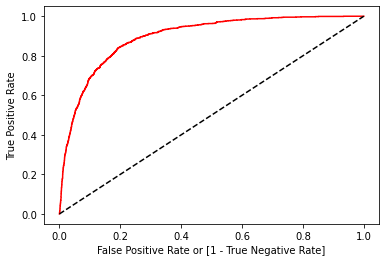

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (x_test)[:,1])
auc = roc_auc_score(y_test,y_test_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')